# A. Multi-Linear Regression by Statsmodels

<div class="alert alert-info"><strong>NOTE:</strong><tt><font color=black>&emsp;</font></tt>

This project is over **Real Estate Price** Prediction by **Size** of the property.

In given a real estate dataset we have two columns PRICE, SIZE, YEAR and VIEW.

The dependent(y)  variable is 'price', while the independent(X) variable is 'size', 'year' and 'view'. </div>

## 1. Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## 2. Load the data

In [2]:
raw_data = pd.read_csv('real_estate_price_size_year_view.csv')

In [3]:
raw_data.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


## 3. Explore the data

In [4]:
raw_data.describe(include='all')

,price,size,year,view
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,No sea view
freq,NaN,NaN,NaN,51
mean,292289.470160,853.024200,2012.600000,NaN
std,77051.727525,297.941951,4.729021,NaN
min,154282.128000,479.750000,2006.000000,NaN
25%,234280.148000,643.330000,2009.000000,NaN
50%,280590.716000,696.405000,2015.000000,NaN
75%,335723.696000,1029.322500,2018.000000,NaN


In [5]:
# missing and null values
raw_data.isna().sum()

price    0
size     0
year     0
view     0
dtype: int64

In [6]:
#Creating dummy variables
data = raw_data.copy()
data['view'] = data['view'].map({'Sea view': 1, 'No sea view': 0})

In [9]:
data.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


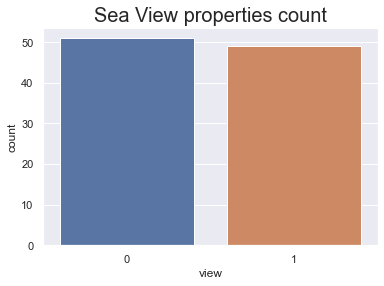

In [7]:
import seaborn as sns
sns.countplot(data['view'])
plt.title('Sea View properties count', size = 20)
plt.show()

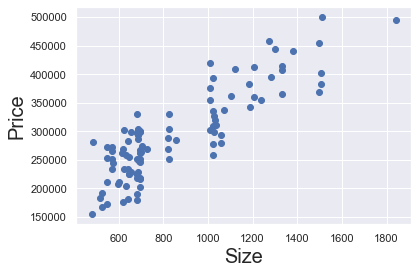

In [8]:
plt.scatter(data['size'], data['price'])
plt.xlabel('Size',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

## 4. Declare the dependent and the independent variables

In [10]:
y = data['price']
x1 = data[['size','year','view']]

## 5. Create the regression

In [11]:
X = sm.add_constant(x1)
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           1.02e-50
Time:                        00:35:14   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#  B. Multi Linear Regression by SKlearn

In [12]:
from sklearn.linear_model import LinearRegression 

In [13]:
X = data[['size', 'year', 'view']]

In [14]:
linear_reg = LinearRegression()
linear_reg.fit(X,y)

LinearRegression()

### R-squared
R-squared is a goodness-of-fit measure for linear regression models.

In [15]:
print(f'R-squared for linear regression model is {round(linear_reg.score(X,y),2)}. 1 is for best and 0 is for worst.')

R-squared for linear regression model is 0.91. 1 is for best and 0 is for worst.


### Making predictions
find an apartment online with a size of 750 sq.ft.

In [16]:
data['year'].max()

2018

In [17]:
price_for_750_2010_1 = linear_reg.predict([[750, 2010, 1]])

print(f"Price for 750sq.ft 2010's year and sea view property $", round(float(price_for_750_2010_1),2))

Price for 750sq.ft 2010's year and sea view property $ 291172.82
